# Arabic Text OCR

(-0.5, 4166.5, 2291.5, -0.5)

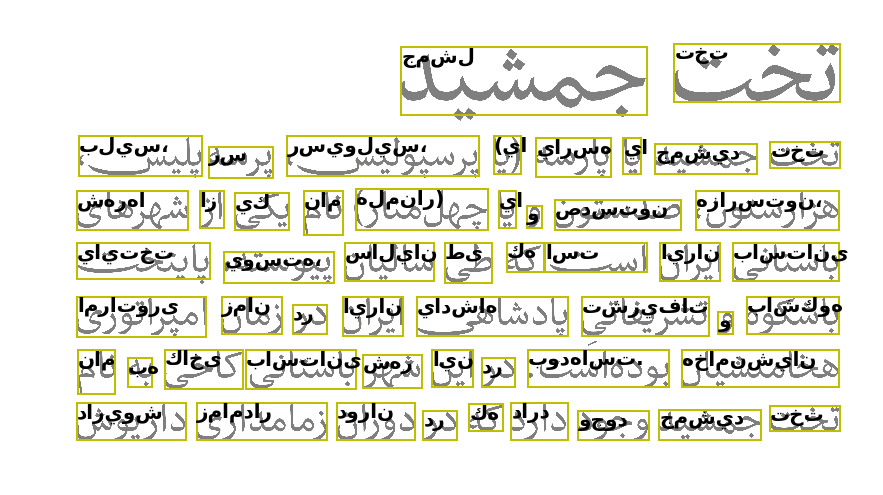

In [1]:
import requests
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
from io import BytesIO

subscription_key = ""
vision_base_url = "https://westeurope.api.cognitive.microsoft.com/vision/v2.0/"

ocr_url = vision_base_url + "ocr"

# Set image_url to the URL of an image that you want to analyze.
image_url = "http://www.aljanh.net/data/archive/img/4011078801.png"

headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params  = {'language': 'unk', 'detectOrientation': 'true'}
data    = {'url': image_url}
response = requests.post(ocr_url, headers=headers, params=params, json=data)
response.raise_for_status()

analysis = response.json()

# Extract the word bounding boxes and text.
line_infos = [region["lines"] for region in analysis["regions"]]
word_infos = []
for line in line_infos:
    for word_metadata in line:
        for word_info in word_metadata["words"]:
            word_infos.append(word_info)

# Display the image and overlay it with the extracted text.
plt.figure(figsize=(15, 15))
image = Image.open(BytesIO(requests.get(image_url).content))
ax = plt.imshow(image, alpha=0.5)
for word in word_infos:
    bbox = [int(num) for num in word["boundingBox"].split(",")]
    text = word["text"]
    origin = (bbox[0], bbox[1])
    patch  = Rectangle(origin, bbox[2], bbox[3], fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(origin[0], origin[1], text, fontsize=20, weight="bold", va="top")
plt.axis("off")

In [2]:
for region in analysis['regions']:
    for line in region['lines']:
        joined_texts = ''
        line_texts = [word['text'] for word in line['words']]#[::-1]
        print(line_texts)

['جمشل', 'تخت']
['بليس،', 'رس', 'رسيوليس،', '(يا', 'يارسه', 'يا', 'جمشيد', 'تخت']
['شهرها', 'از', 'يك', 'نام', 'هلمنار)', 'يا', 'و', 'صدستون', 'هزارستون،']
['يايتخت', 'يوسته،', 'ساليان', 'طى', 'كه', 'است', 'ايران', 'باستانى']
['امراتورى', 'زمان', 'در', 'ايران', 'يادشاه', 'تشريفات', 'و', 'باشكوه']
['نام', 'به', 'كاخى', 'باستانى', 'شهر', 'اين', 'در', 'بودهاست.', 'هخامنشيان']
['داريوش', 'زمامدار', 'دوران', 'در', 'كه', 'دارد', 'وجود', 'جمشيد', 'تخت']
